<a href="https://colab.research.google.com/github/Jomonjoseph25/DSA_B5_Assignments/blob/main/Case_Study_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load Data**

In [2]:
iris = pd.read_excel('/content/drive/MyDrive/Case Study 7/iris.xls')
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

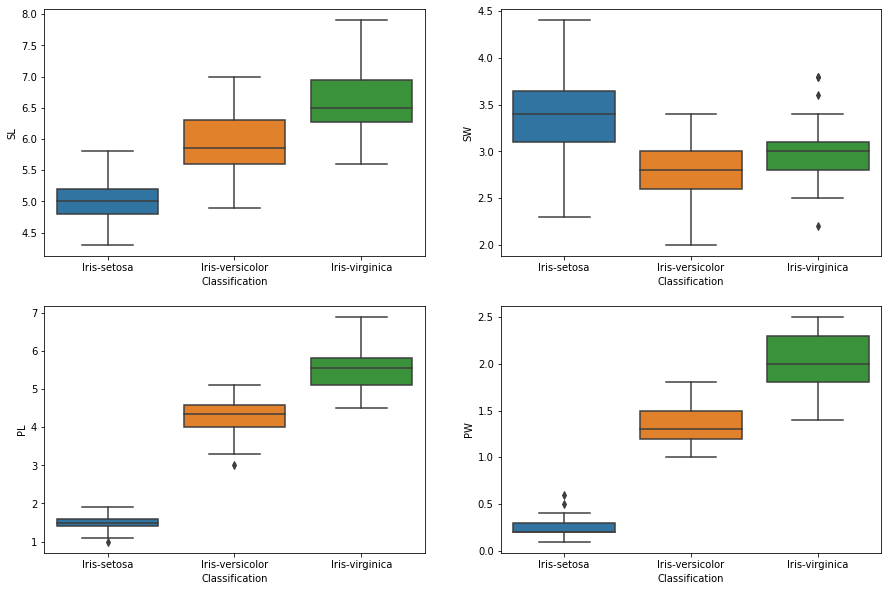

In [9]:
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='Classification',y='SL',data=iris)    
plt.subplot(2,2,2)    
sns.boxplot(x='Classification',y='SW',data=iris)    
plt.subplot(2,2,3)    
sns.boxplot(x='Classification',y='PL',data=iris)    
plt.subplot(2,2,4)    
sns.boxplot(x='Classification',y='PW',data=iris) 

**Preprocessing**

In [10]:
for i in ['SL', 'SW', 'PL']:
  iris[i]=iris[i].fillna(iris[i].median(),downcast=False)
iris.isna().sum()


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Splitting the Data

In [17]:
y = iris.drop(['SL', 'SW', 'PL', 'PW'],axis=1)
x = iris.drop(['Classification'],axis=1)
y


,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


**Label Encoding**

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
x_train.shape

(112, 4)

In [20]:
x_test.shape

(38, 4)

In [21]:
y_train.shape

(112,)

**Training Models**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**Model 1 - Logistics Regression**

In [23]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_prediction = logistic_model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,y_prediction))

Accuracy is: 0.9736842105263158


**Model 2 - SVM**

In [30]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)
print("The accuracy score using linear svm is ", accuracy_score(y_test,y_pred))

The accuracy score using linear svm is  1.0


**Model - 3 Random Forest**

In [31]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("The accuracy score using random forest classifier is ", accuracy_score(y_test,y_pred))

The accuracy score using random forest classifier is  1.0


**Scaling and Fitting models**

In [32]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the class
scaler = StandardScaler()

In [42]:
x.loc[:,:] = scaler.fit_transform(x)
x

,SL,SW,PL,PW
0,-0.934811,1.076275,-1.380791,-1.312977
1,-1.182990,-0.112541,-1.380791,-1.312977
2,-0.066181,0.362985,-1.438808,-1.312977
3,-1.555260,0.125222,-1.322775,-1.312977
4,-1.058900,1.314038,-1.380791,-1.312977
...,...,...,...,...
145,1.050628,-0.112541,0.823834,1.447956
146,0.554268,-1.301358,0.707801,0.922064
147,0.802448,-0.112541,0.330694,1.053537
148,0.430178,0.838512,0.939866,1.447956


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
x_train.head()

,SL,SW,PL,PW
4,-1.058900,1.314038,-1.380791,-1.312977
32,-0.810721,2.502855,-1.322775,-1.444450
142,-0.066181,-0.825831,0.765817,0.922064
85,-0.066181,0.838512,0.417718,0.527645
86,1.050628,0.125222,0.533751,0.396172


In [44]:
#LR
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_prediction = logistic_model.predict(x_test)
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,y_prediction))

Accuracy is: 0.9736842105263158


In [45]:
#SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)
print("The accuracy score using linear svm is ", accuracy_score(y_test,y_pred))

The accuracy score using linear svm is  0.9736842105263158


In [51]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("The accuracy score using random forest classifier is ", accuracy_score(y_test,y_pred))
y_test

The accuracy score using random forest classifier is  1.0


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [49]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

As per the result Random Forest classifier give the most accurate result